# Facies Data Exploratory and Data Analysis

---
## A. Import Library

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

---
## B. Import Data

In [4]:
def populate_raw_data(directory:str="well_data/") -> pd.DataFrame:     # Put this function on script
    raw_data = pd.DataFrame()
    for well_data in os.listdir(directory):
        raw_data = pd.concat([raw_data,pd.read_csv(directory+well_data)],
                             axis=0,
                             ignore_index=True)
    return raw_data

In [5]:
raw_data = populate_raw_data()

In [6]:
def split_well_train_test(data:pd.DataFrame, well_name:str):
    data_train_unclean = data[data["Well Name"]!=well_name]
    data_test_unclean = data[data["Well Name"]==well_name]
    
    return data_train_unclean, data_test_unclean

In [7]:
data_train, data_test = split_well_train_test(data=raw_data, well_name="CHURCHMAN BIBLE")

In [8]:
data_train.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,CSiS,A1 SH,NOLAN,2853.5,106.813,0.533,9.339,15.222,3.500,1,1.000
1,FSiS,A1 SH,NOLAN,2854.0,100.938,0.542,8.857,15.313,3.416,1,0.977
2,FSiS,A1 SH,NOLAN,2854.5,94.375,0.553,7.097,14.583,3.195,1,0.955
3,FSiS,A1 SH,NOLAN,2855.0,89.813,0.554,7.081,14.110,2.963,1,0.932
4,FSiS,A1 SH,NOLAN,2855.5,91.563,0.560,6.733,13.189,2.979,1,0.909


In [9]:
sns.set_style('darkgrid')

---
## C. Output Feature : Facies

In [10]:
facies_colors_pallete = {'SS':'#F4D03F', 'CSiS':'#F5B041', 'FSiS':'#DC7633','SiSh':'#6E2C00',
       'MS':'#1B4F72', 'WS':'#2E86C1', 'D':'#AED6F1', 'PS':'#A569BD', 'BS':'#196F3D'}

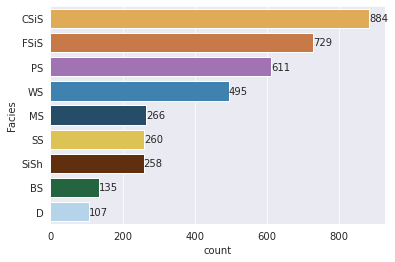

In [11]:
ax = sns.countplot(data=data_train, y='Facies',
              order=data_train['Facies'].value_counts().index,
              palette=facies_colors_pallete)
ax.bar_label(ax.containers[0])
plt.show()

the count plot show us that there are variative facies in the raw dataset. The most abudant facies is the CSiS (Coarse Siltstone), while the least facies is D (Dolomite). As we can see from this countplot, output feature for modeling was imbalance in category, hence we will use balancing technique for modeling machine learning late

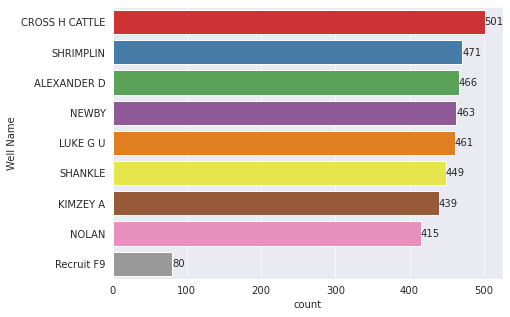

In [12]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(data=data_train, y='Well Name',
              order=data_train['Well Name'].value_counts().index,
              palette=sns.color_palette("Set1", 10))
ax.bar_label(ax.containers[0])
plt.show()

as you can see from the countplot above almost for every well the data is nearly balance in amount but for well RecruitF9 the amount of data is very different. Of course because this RecruitF9 is the synthetic well for balancing data train for category BS, then it is okay to have this well data for training. Next I will check null value for output data

In [47]:
data_train['Facies'].isnull().sum()

0

fortunatelly we don't have null value at the output feature facies

---
## D. Input Numerical Feature : GR, ILD_log10, DeltaPHI, PHIND, PE

before we do EDA on numerical feature data we should normalize the data first

In [23]:
from sklearn.preprocessing import StandardScaler

In [32]:
data_numeric = data_train[['GR','ILD_log10','DeltaPHI','PHIND','PE']]

In [33]:
data_numeric.head()

,GR,ILD_log10,DeltaPHI,PHIND,PE
0,106.813,0.533,9.339,15.222,3.500
1,100.938,0.542,8.857,15.313,3.416
2,94.375,0.553,7.097,14.583,3.195
3,89.813,0.554,7.081,14.110,2.963
4,91.563,0.560,6.733,13.189,2.979


In [44]:
data_numeric.describe()

,GR,ILD_log10,DeltaPHI,PHIND,PE
count,3745.000000,3745.000000,3745.000000,3745.000000,2828.000000
mean,65.068888,0.648865,4.709123,13.113680,3.715741
std,29.958920,0.251600,5.331411,6.651433,0.864266
min,10.149000,-0.025949,-19.900000,0.550000,0.200000
25%,46.063000,0.489000,1.900000,8.600000,3.100000
50%,65.330000,0.624282,4.700000,12.154000,3.515000
75%,79.940000,0.803000,7.912000,16.000000,4.300000
max,361.150000,1.800000,19.312000,84.400000,8.094000


numerical range data can be looked from min and max value for every feature, from this table I could say that for well measureemnt data this min and max value is still acceptable an in range, so for modeling it was fine. Next let's take a look at the data distribution 

<AxesSubplot:>

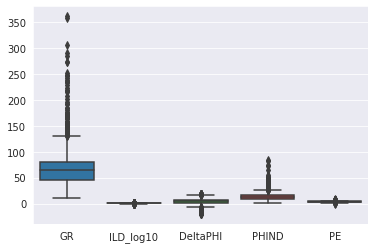

In [34]:
sns.boxplot(data=data_numeric)

from the boxplot above we could see that the range value between GR and other numerical feature was very different, hence we will use normalization for this numerical feature for modeling

In [35]:
data_numeric_normal = StandardScaler().fit(data_numeric).transform(data_numeric)
data_numeric_normal = pd.DataFrame(data=data_numeric_normal, columns=data_numeric.columns)

In [38]:
data_numeric_normal.head()

,GR,ILD_log10,DeltaPHI,PHIND,PE
0,1.393564,-0.460574,0.868531,0.317015,-0.249667
1,1.197436,-0.424799,0.778111,0.330698,-0.346877
2,0.978341,-0.381073,0.447948,0.220932,-0.602630
3,0.826045,-0.377097,0.444947,0.149810,-0.871114
4,0.884466,-0.353247,0.379664,0.011325,-0.852598


In [37]:
data_numeric_normal.describe()

,GR,ILD_log10,DeltaPHI,PHIND,PE
count,3.745000e+03,3.745000e+03,3.745000e+03,3.745000e+03,2.828000e+03
mean,3.959450e-16,5.334703e-16,1.440177e-16,1.889454e-16,-8.416181e-16
std,1.000134e+00,1.000134e+00,1.000134e+00,1.000134e+00,1.000177e+00
min,-1.833418e+00,-2.682445e+00,-4.616491e+00,-1.889120e+00,-4.068612e+00
25%,-6.344830e-01,-6.354781e-01,-5.269708e-01,-6.786932e-01,-7.125698e-01
50%,8.716819e-03,-9.772006e-02,-1.711376e-03,-1.443009e-01,-2.323085e-01
75%,4.964497e-01,6.126991e-01,6.008362e-01,4.339975e-01,6.761375e-01
max,9.884223e+00,4.575861e+00,2.739392e+00,1.071887e+01,5.066767e+00


after normalization we will have dataset with zero mean value and one standard deviation

In [39]:
data_numeric_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3745 entries, 0 to 3744
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GR         3745 non-null   float64
 1   ILD_log10  3745 non-null   float64
 2   DeltaPHI   3745 non-null   float64
 3   PHIND      3745 non-null   float64
 4   PE         2828 non-null   float64
dtypes: float64(5)
memory usage: 146.4 KB


all numeric data that we will use for modeling are float64 data type

<AxesSubplot:>

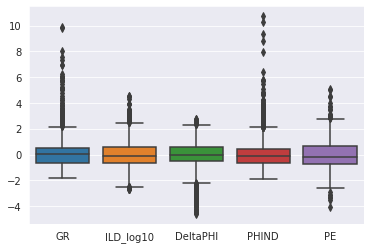

In [43]:
sns.boxplot(data=data_numeric_normal)

at you can see from the boxplot now every feature has simillar distribution between numerical feature. The boxplot show that there are outliers for every feature, but we canno't drop the outlier's since, in well measurement, outlier means different properties in rock facies, so that is an important value for analysis

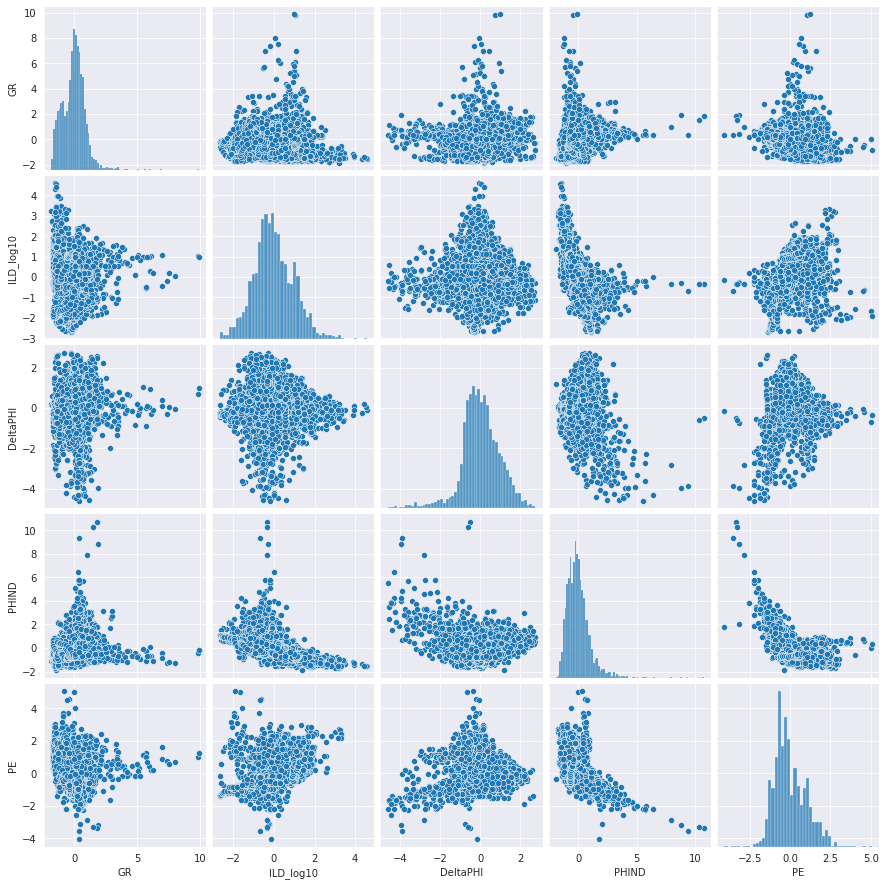

In [40]:
sns.pairplot(data=data_numeric_normal)

<AxesSubplot:>

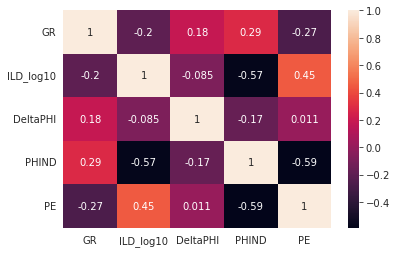

In [41]:
sns.heatmap(data = data_numeric.corr(), annot=True)

as you can see that from the pair plot and correlation map of numerical data, we can say that numerical data are not correlated each other. The highest correlation value is -0.59 between PHIND and PE but we also can't say that this is strongly correlated. Hende for modeling we're using all numerical featur. Next lets we check whether there are missing value in numerical data

In [42]:
data_numeric.isnull().sum()

GR             0
ILD_log10      0
DeltaPHI       0
PHIND          0
PE           917
dtype: int64

we have 917 missing value in PE measurement, this missing value can be handled by using mean imputer

---
## E. Input Categorical Feature : NM_M

In [54]:
data_categorical = data_train['NM_M']

<AxesSubplot:xlabel='NM_M', ylabel='count'>

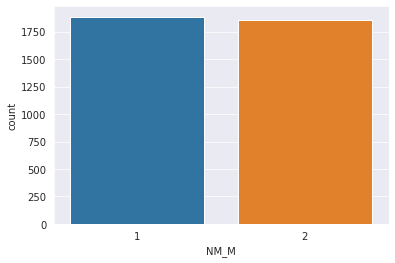

In [56]:
sns.countplot(x = data_categorical)

from the value counts we can see that the categori NM_M data is nearly balance with category 1 has 1886 count and category 2 has 1859 count, next we will check if there is a null value in this categorical data

In [57]:
data_categorical.isnull().sum()

0

fortunatelly we do not have any missing value in this categorical data. Next lets check the data type

In [58]:
data_categorical.info()

<class 'pandas.core.series.Series'>
Int64Index: 3745 entries, 0 to 4148
Series name: NM_M
Non-Null Count  Dtype
--------------  -----
3745 non-null   int64
dtypes: int64(1)
memory usage: 187.6 KB


although this feature is categorical data, the data type is interger. That is not a problem since modeling will only accept numerical data, but for the modeling purpose later this data will be encode by OHE because this is non ordinal data, and the value will be change to 0 and 1 as how OHE works. 

---
## F. Dropped Features : Formation, Well Name, Depth, RELPOS

#### RELPOS

In [61]:
data_train.groupby(["Well Name","Formation"]).aggregate({'Depth':['min','max'],'RELPOS':['min','max']})

Depth         RELPOS     
                          min     max    min  max
Well Name   Formation                            
ALEXANDER D A1 LM      2907.0  2939.0  0.015  1.0
            A1 SH      2887.5  2906.5  0.026  1.0
            B1 LM      2956.0  2966.0  0.048  1.0
            B1 SH      2939.5  2955.5  0.031  1.0
            B2 LM      2978.0  2987.5  0.050  1.0
...                       ...     ...    ...  ...
SHRIMPLIN   B4 SH      2911.0  2925.0  0.034  1.0
            B5 LM      2938.0  2948.0  0.050  1.0
            B5 SH      2930.0  2937.5  0.118  1.0
            C LM       2977.0  3028.0  0.010  1.0
            C SH       2948.5  2976.5  0.018  1.0

[114 rows x 4 columns]

In [63]:
data_train.loc[(data_train["Well Name"]=='ALEXANDER D') & (data_train["Formation"]=='A1 SH')][['Depth','RELPOS']].corr()

,Depth,RELPOS
Depth,1.0,-1.0
RELPOS,-1.0,1.0


from this analysis we know that variable depth and RELPOS are strongly correlated, we can say that RELPOS is MinMaxScaller of depth for every formation group, hence for modeling purpose we could drop RELPOS because it is strongly correlated to depth

#### Formation Features

In [66]:
data_train["Formation"].unique()

array(['A1 SH', 'A1 LM', 'B1 SH', 'B1 LM', 'B2 SH', 'B2 LM', 'B3 SH',
       'B3 LM', 'B4 SH', 'B4 LM', 'B5 SH', 'B5 LM', 'C SH', 'C LM'],
      dtype=object)

formation data contains formation name in every well data, this is just a naming convention for labeling the reservoar under the surface. This data is meaningless for lithofacies classification so I would drop it from the feature modeling

#### Depth Features

In [69]:
data_train["Depth"].value_counts().sum()

3745

because depth is highly unique feature and wont held in classification algorithm, hence for modeling purpose I would drop this features

#### Well Name Features

In [72]:
data_train["Well Name"].unique()

array(['NOLAN', 'LUKE G U', 'CROSS H CATTLE', 'KIMZEY A', 'SHRIMPLIN',
       'NEWBY', 'Recruit F9', 'SHANKLE', 'ALEXANDER D'], dtype=object)

well data feature is just an identifier for the source of the data, hence this feature isn't important for this lithofacies classification. From this feature selection activity we know that our input for classification problem is come from wireline measurement feature (GR, ILD_log10, PE, DeltaPHI, PHIND) and the output for classification is Facies Label, the rest of the feature will be dropped from modeling

---
## G. Summary

From this EDA we will use some features from this raw data and drop several features from the raw data, as follows :
- Input Features Numerical : GR, ILD_log10, DeltaPHI, PHIND, PE
- Input Features Categorical : NM_M
- Output Feratures : Facies
- Dropped Features : Well Name, Formation, Depth, and RELPOS

And there are some data processing that need to be done for modeling : 
- Impute missing value of PE measurement data
- OHE NM_M features
- Normalize train data